In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Finite Element noise coupling mechanism

So this notebook is for me to get my head around the finite-element coupling Prof. Giles has suggested I use. Let's do some investigating. 

$$
\mathrm{d}u - u_{xx} \mathrm{d}t = \mathrm{d}W \quad 0 \le x \le 1, \quad u(0, t) = u(1, t) = 0
$$

There's our familiar stochastic heat equation. $\mathrm{d}W$ is space-time white noise, defined by the spatial inner product $(f, \mathrm{d}W)$ being normally distributed with variance $(f,f)\mathrm{d}t$, and 

$$
\mathbb{E}[(f, \mathrm{d}W)(g, \mathrm{d}W)] = (f,g)\mathrm{d}t
$$
Beautiful, those are defined. 

Prof. Giles suggests starting with a semi-discretisation in which we will discretise spatially on a uniform grid with spacing $h = 1/N$.

Let's just plot that over the $[0,1]$ domain.

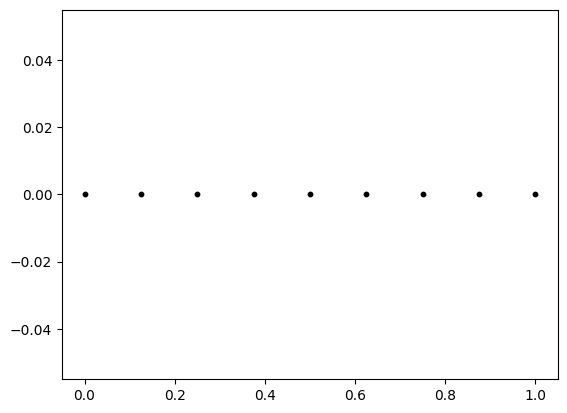

In [9]:
l = 2
N = 2**(l + 1)
domain = np.linspace(0, 1, N + 1)
plt.scatter(domain, np.zeros(N + 1), s=10, color='black', label='Grid Points')
h = 1 / N

What's a semi-discretisation? one part discrete, one part continuous. We discretise spatially on a uniform grid.
Prof Giles has suggested the following finite element approximation at time $t$:
$$
U(x,t) = \sum_{j=1}^{N-1}U_j(t)\phi_j(x)
$$

where

$$
\phi_j(x) = \max(0, 1 - |x - x_j| / h)
$$

with $x_j = jh$.

So let's see this basis function.

spatial width:  0.125


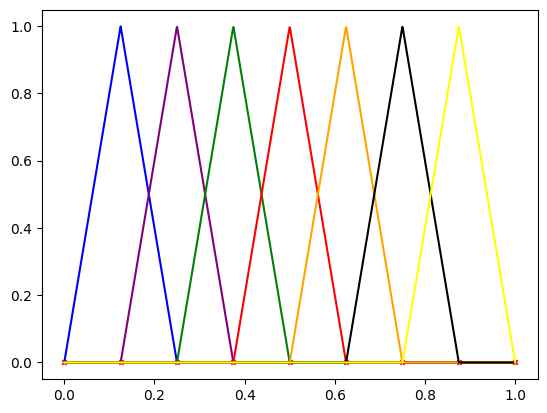

In [18]:
phi = lambda x, j: np.maximum(0, 1 - abs(x - j * h) / h)
print("spatial width: ", h)
phi_1 = lambda x: phi(x, 1)
phi_2 = lambda x: phi(x, 2)
phi_3 = lambda x: phi(x, 3)
phi_4 = lambda x: phi(x, 4)
phi_5 = lambda x: phi(x, 5)
phi_6 = lambda x: phi(x, 6)
phi_7 = lambda x: phi(x, 7)
x_grid = np.linspace(0, 1, 1000)
plt.plot(x_grid, phi_1(x_grid), label=r'$\phi_1(x)$', color='blue')
plt.plot(x_grid, phi_2(x_grid), label=r'$\phi_2(x)$', color='purple')
plt.plot(x_grid, phi_3(x_grid), label=r'$\phi_3(x)$', color='green')
plt.plot(x_grid, phi_4(x_grid), label=r'$\phi_4(x)$', color='red')
plt.plot(x_grid, phi_5(x_grid), label=r'$\phi_5(x)$', color='orange')
plt.plot(x_grid, phi_6(x_grid), label=r'$\phi_6(x)$', color='black')
plt.plot(x_grid, phi_7(x_grid), label=r'$\phi_7(x)$', color='yellow')
plt.scatter(domain, np.zeros(N + 1), marker='x', s=10, color='red', label='Grid Points')
plt.show()

Ok, these are pretty neat. They are likely orthogonal and probably satisfy kronecker-delta at x_j. 

So next, Prof. Giles says the Galerkin semi-discrete equations are given by:

$$
(\mathrm{d}U, \phi_k) + (U', \phi_j') \mathrm{d}t = (\mathrm{d}W, \phi_j), \quad j = 1, \dots, N-1
$$

This is a kind of equation that arises from imposing that $u$ exists a sa function in the Hilbert space. This is weaker than the requirement that $u$ exists as a function being differentiable anywhere. We only require that $u$ is integrable over the spatial domain. So we can express $u$ in these basis functions. 
What comes out of the above inner products is:

$$
M \mathrm{d}U + K U \mathrm{d}t = \mathrm{d}W,
$$

where $M$ is a tri-diagonal matrix with elements 
$$
M_{i,i} = \frac{2}{3}h, M_{i,i\pm 1} = \frac{1}{6} h
$$

where $K$ is a tri-diagonal matrix with elements 
$$
K_{i,i} = 2h^{-1}, K_{i, i\pm 1} = -h^{-1}
$$

and $\mathrm{d}Z is a vector of normal increments with 

$$
\mathbb{E}[\mathrm{d}W_i^2] = \frac{2}{3}h\mathrm{d}t, 
\quad \mathbb{E}[\mathrm{d}W_i\mathrm{d}Z_{i\pm 1}] = \frac{1}{6}h \mathrm{d}t.
$$

What does all this mean?
Galerkin idea is to pick out finite-dimensional subspace $V_h = \mathrm{span}\{\phi_1, \dots, \phi_{N-1}\}$ and require that $u$ only satisfy the weak form of satisfying the SPDE, i.e. satisfies it in the integral sense. This justifies us using these hat basis functions. 

Basically, we can obtain the above discrete inner product formula, That relationship of inner products can be re-expressed as a matrix vector form which I've written above.



In [ ]:
# Let's try and make the components of the above equation
def M(i,j,h):
    if i == j:
        return 2 * h / 3
    elif abs(i - j) == 1:
        return h / 6
    else:
        return 0.0
def K(i, j, h):
    if i == j:
        return 2 / h
    elif abs(i - j) == 1:
        return - 1 / h
    else:
        return 0.0

Can y

In [23]:
a = np.array([[1,2,3,4,5,6,7], 
              [1,2,3,4,5,6,7]]).T
print(a[0::2, :], '\n', a[1::2,:], '\n', a[2::2, :])

[[1 1]
 [3 3]
 [5 5]
 [7 7]] 
 [[2 2]
 [4 4]
 [6 6]] 
 [[3 3]
 [5 5]
 [7 7]]
